¿Qué empresa desea analizar?
1. Apple
2. Microsoft
3. Amazon
4. Google
5. Facebook
6. Tesla
7. Nvidia
                                Open       High        Low      Close  \
Date                                                                    
2012-01-03 00:00:00-05:00  16.222704  16.600606  16.208540  16.532528   
2012-01-04 00:00:00-05:00  16.523088  16.652782  16.413519  16.603836   
2012-01-05 00:00:00-05:00  16.451035  16.496751  16.304445  16.373516   
2012-01-06 00:00:00-05:00  16.376995  16.398115  16.144440  16.150156   
2012-01-09 00:00:00-05:00  16.062697  16.075122  15.434848  15.465409   
...                              ...        ...        ...        ...   
2019-12-24 00:00:00-05:00  67.259824  67.347606  66.974522  67.013428   
2019-12-26 00:00:00-05:00  67.143604  67.899598  67.058813  67.853355   
2019-12-27 00:00:00-05:00  67.982550  68.059365  67.300228  67.428909   
2019-12-30 00:00:00-05:00  67.334636  67.484271  66.537590  66.643333   
2019-12-31 00:00:00-05

C:\Users\HONOR\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.0438
Epoch 2/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0025
Epoch 3/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0022
Epoch 4/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0021
Epoch 5/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0017
Epoch 6/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0020
Epoch 7/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0016
Epoch 8/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0016
Epoch 9/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 0.0015
Epoch 10/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 0.0015
Epoch 11/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0014
Epoch 12/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0014
Epoch 13/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0014
Epoch 14/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0013
Epoch 15/25
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0013
Epoc

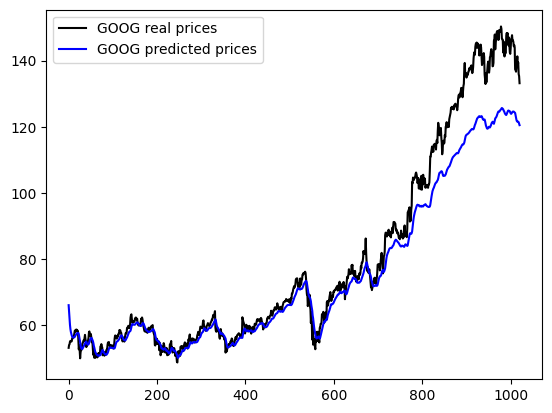

56.221479696429434 %


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import yfinance as yf

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,GRU

#Seleccionar la empresa
print("¿Qué empresa desea analizar?")
print("1. Apple")
print("2. Microsoft")
print("3. Amazon")
print("4. Google")
print("5. Facebook")
print("6. Tesla")
print("7. Nvidia")

indicator = int(input())

if indicator == 1:
    company = 'AAPL'
elif indicator == 2:
    company = 'MSFT'
elif indicator == 3:
    company = 'AMZN'
elif indicator == 4:
    company = 'GOOG'
elif indicator == 5:
    company = 'FB'
elif indicator == 6:
    company = 'TSLA'
elif indicator == 7: 
    company = 'NVDA'
else:
    print("Opción no válida")
    exit()


#cargar datos
ticker = yf.Ticker(company)
hist = ticker.history(start = '2012-1-1', end='2020-1-1')

print(hist)

#Preparar los datos
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(hist['Close'].values.reshape(-1,1)) #esto esta fallando, nc porque

prediction_days = 60

x_train = []
y_train = []

for x in range(prediction_days,len(scaled_data)):
  x_train.append(scaled_data[x-prediction_days:x,0])
  y_train.append(scaled_data[x,0])

x_train,y_train = np.array(x_train),np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

#Contruir el modelo
model = Sequential()

model.add(GRU(units=50,return_sequences = True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(GRU(units=50,return_sequences = True))
model.add(Dropout(0.2))
model.add(GRU(units=50))
model.add(Dropout(0.1))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train,y_train,epochs=25,batch_size=32)

#Cargar los datos del test
hist_test = ticker.history(start = '2018-1-1', end='2022-1-21')
actual_prices = hist_test["Close"].values

total_dataset = pd.concat((hist['Close'],hist_test['Close']),axis=0)
model_inputs = total_dataset[len(total_dataset)-len(hist_test)-prediction_days:].values
model_inputs = scaler.transform(model_inputs.reshape(-1,1))

#Preparar los datos del test
x_test = []

for x in range(prediction_days,len(model_inputs)):
  x_test.append(model_inputs[x-prediction_days:x,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

#Graficar los datos
plt.plot(actual_prices,color="black",label=f"{company} real prices")
plt.plot(predicted_prices,color="blue",label=f"{company} predicted prices")
plt.legend()
plt.show()

#Calcular rentabilidad
rentability = 1
for i in range(1,len(actual_prices)):
  if predicted_prices[i] > actual_prices[i-1]:
    rentability*= actual_prices[i]/actual_prices[i-1]

print("La rentabilidad es: ",(rentability-1)*100,"%")